In [12]:
import os
os.environ["DATA_PATH"] = "/home/jupyter-chenxi/proteina/data"
import hydra
import lightning as L
import numpy as np
import pandas as pd
import torch
from proteinfoundation.datasets.transforms import CATHLabelTransform
from tqdm import tqdm
from matplotlib import pyplot as plt


In [2]:
seq_cath_lora_r8_aln_df = pd.read_csv("/home/jupyter-chenxi/proteina/inference/inference_seq_cath_cond_sampling_21-seq_lora-r8/4jnj_A/aln.tsv", sep="\t")
seq_cath_aln_df = pd.read_csv("/home/jupyter-chenxi/proteina/inference/inference_seq_cath_cond_sampling_21-seq/4jnj_A/aln.tsv", sep="\t")
seq_aln_df = pd.read_csv("/home/jupyter-chenxi/proteina/inference/inference_seq_cond_sampling_21-seq/4jnj_A/aln.tsv", sep="\t")
seq_lora_r8_aln_df = pd.read_csv("/home/jupyter-chenxi/proteina/inference/inference_seq_cond_sampling_21-seq_lora-r8/4jnj_A/aln.tsv", sep="\t")
seq_lora_r4_aln_df = pd.read_csv("/home/jupyter-chenxi/proteina/inference/inference_seq_cond_sampling_21-seq_lora-r4/4jnj_A/aln.tsv", sep="\t")
seq_lora_r2_aln_df = pd.read_csv("/home/jupyter-chenxi/proteina/inference/inference_seq_cond_sampling_21-seq_lora-r2/4jnj_A/aln.tsv", sep="\t")


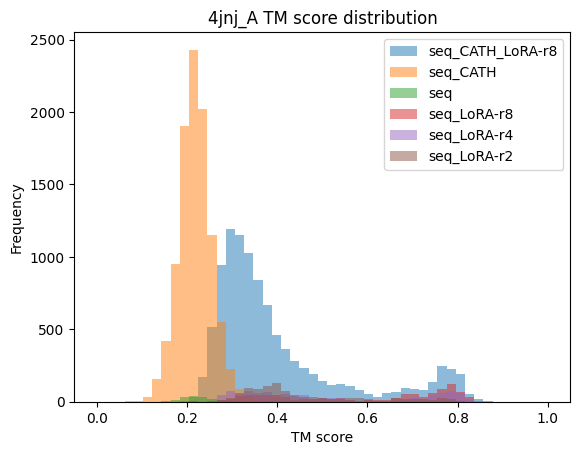

In [3]:
plt.hist(seq_cath_lora_r8_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_CATH_LoRA-r8")
plt.hist(seq_cath_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_CATH")
plt.hist(seq_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq")
plt.hist(seq_lora_r8_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_LoRA-r8")
plt.hist(seq_lora_r4_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_LoRA-r4")
plt.hist(seq_lora_r2_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_LoRA-r2")
plt.xlabel("TM score")
plt.ylabel("Frequency")
plt.title("4jnj_A TM score distribution")
plt.legend()
plt.show()


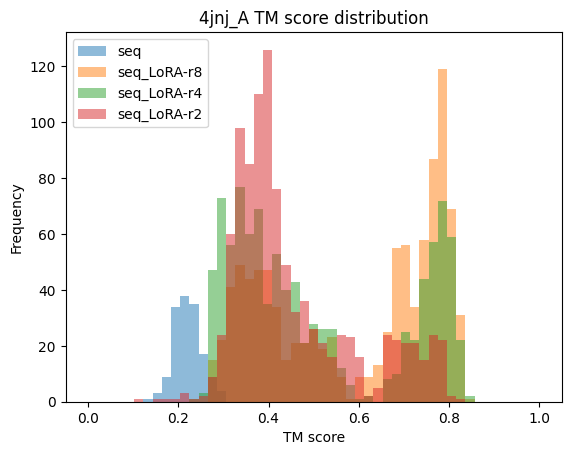

In [4]:
plt.hist(seq_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq")
plt.hist(seq_lora_r8_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_LoRA-r8")
plt.hist(seq_lora_r4_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_LoRA-r4")
plt.hist(seq_lora_r2_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_LoRA-r2")
plt.xlabel("TM score")
plt.ylabel("Frequency")
plt.title("4jnj_A TM score distribution")
plt.legend()
plt.show()

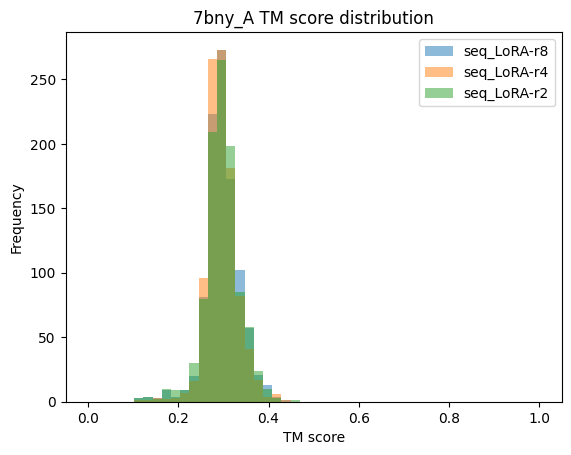

In [3]:
seq_lora_r8_purge_7bny_aln_df = pd.read_csv("/home/jupyter-chenxi/proteina/inference/inference_seq_cond_sampling_21-seq_lora-r8_purge-7bny/7bny_A/aln.tsv", sep="\t")
seq_lora_r4_purge_7bny_aln_df = pd.read_csv("/home/jupyter-chenxi/proteina/inference/inference_seq_cond_sampling_21-seq_lora-r4_purge-7bny/7bny_A/aln.tsv", sep="\t")
seq_lora_r2_purge_7bny_aln_df = pd.read_csv("/home/jupyter-chenxi/proteina/inference/inference_seq_cond_sampling_21-seq_lora-r2_purge-7bny/7bny_A/aln.tsv", sep="\t")

plt.hist(seq_lora_r8_purge_7bny_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_LoRA-r8")
plt.hist(seq_lora_r4_purge_7bny_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_LoRA-r4")
plt.hist(seq_lora_r2_purge_7bny_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_LoRA-r2")
plt.xlabel("TM score")
plt.ylabel("Frequency")
plt.title("7bny_A TM score distribution")
plt.legend()
plt.show()


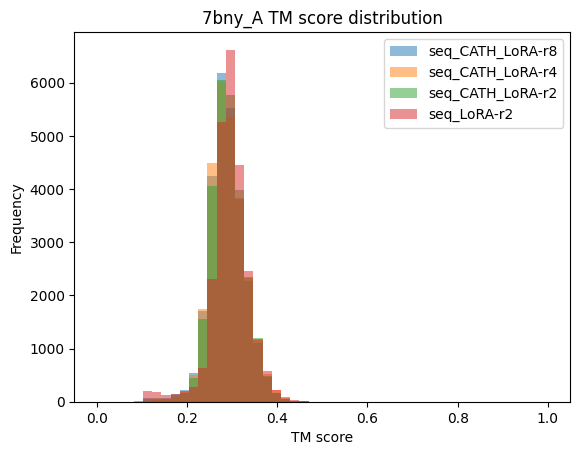

In [3]:
seq_cath_lora_r8_purge_7bny_aln_df = pd.read_csv("/home/jupyter-chenxi/proteina/inference/inference_seq_cath_cond_sampling_21-seq_lora-r8_purge-7bny/7bny_A/aln.tsv", sep="\t")
seq_cath_lora_r4_purge_7bny_aln_df = pd.read_csv("/home/jupyter-chenxi/proteina/inference/inference_seq_cath_cond_sampling_21-seq_lora-r4_purge-7bny/7bny_A/aln.tsv", sep="\t")
seq_cath_lora_r2_purge_7bny_aln_df = pd.read_csv("/home/jupyter-chenxi/proteina/inference/inference_seq_cath_cond_sampling_21-seq_lora-r2_purge-7bny/7bny_A/aln.tsv", sep="\t")
seq_lora_r2_purge_7bny_aln_df = pd.read_csv("/home/jupyter-chenxi/proteina/inference/inference_seq_cond_sampling_21-seq_lora-r2_purge-7bny/7bny_A/aln.tsv", sep="\t")

plt.hist(seq_cath_lora_r8_purge_7bny_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_CATH_LoRA-r8")
plt.hist(seq_cath_lora_r4_purge_7bny_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_CATH_LoRA-r4")
plt.hist(seq_cath_lora_r2_purge_7bny_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_CATH_LoRA-r2")
plt.hist(seq_lora_r2_purge_7bny_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_LoRA-r2")
plt.xlabel("TM score")
plt.ylabel("Frequency")
plt.title("7bny_A TM score distribution")
plt.legend()
plt.show()


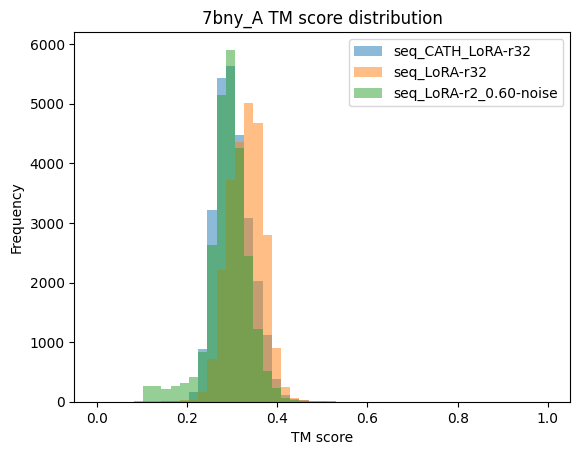

In [9]:
seq_cath_lora_r32_purge_7bny_aln_df = pd.read_csv("/home/jupyter-chenxi/proteina/inference/inference_seq_cath_cond_sampling_21-seq_lora-r32_purge-7bny/7bny_A/aln.tsv", sep="\t")
seq_lora_r32_purge_7bny_aln_df = pd.read_csv("/home/jupyter-chenxi/proteina/inference/inference_seq_cond_sampling_21-seq_lora-r32_purge-7bny/7bny_A/aln.tsv", sep="\t")
seq_lora_r2_purge_7bny_060_noise_aln_df = pd.read_csv("/home/jupyter-chenxi/proteina/inference/inference_seq_cond_sampling_21-seq_lora-r2_purge-7bny_060-noise/7bny_A/aln.tsv", sep="\t")


plt.hist(seq_cath_lora_r32_purge_7bny_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_CATH_LoRA-r32")
plt.hist(seq_lora_r32_purge_7bny_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_LoRA-r32")
plt.hist(seq_lora_r2_purge_7bny_060_noise_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_LoRA-r2_0.60-noise")
plt.xlabel("TM score")
plt.ylabel("Frequency")
plt.title("7bny_A TM score distribution")
plt.legend()
plt.show()


In [10]:
print(seq_cath_lora_r32_purge_7bny_aln_df.sort_values(by="TM1", ascending=False).head(3)["TM1"])
print(seq_lora_r32_purge_7bny_aln_df.sort_values(by="TM1", ascending=False).head(3)["TM1"])
print(seq_lora_r2_purge_7bny_060_noise_aln_df.sort_values(by="TM1", ascending=False).head(3)["TM1"])


15634    0.5583
10919    0.5446
24101    0.5412
Name: TM1, dtype: float64
18365    0.5080
7714     0.5069
7199     0.5017
Name: TM1, dtype: float64
7070     0.5008
24215    0.4954
5058     0.4729
Name: TM1, dtype: float64


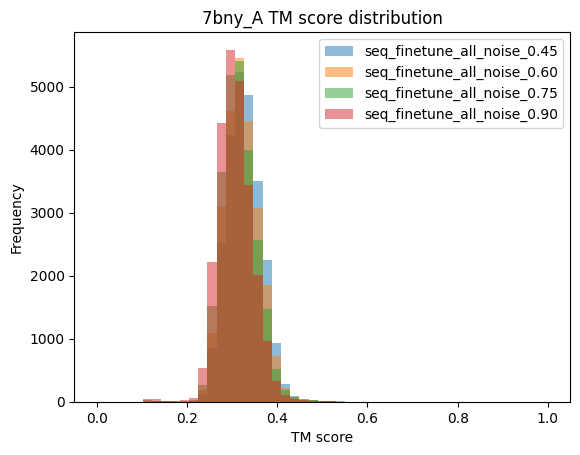

In [2]:
seq_finetune_all_purge_7bny_noise_045_aln_df = pd.read_csv("/home/jupyter-chenxi/proteina/inference/inference_seq_cond_sampling_finetune-all_21-seq_purge-7bny_045-noise/7bny_A/aln.tsv", sep="\t")
seq_finetune_all_purge_7bny_noise_060_aln_df = pd.read_csv("/home/jupyter-chenxi/proteina/inference/inference_seq_cond_sampling_finetune-all_21-seq_purge-7bny_060-noise/7bny_A/aln.tsv", sep="\t")
seq_finetune_all_purge_7bny_noise_075_aln_df = pd.read_csv("/home/jupyter-chenxi/proteina/inference/inference_seq_cond_sampling_finetune-all_21-seq_purge-7bny_075-noise/7bny_A/aln.tsv", sep="\t")
seq_finetune_all_purge_7bny_noise_090_aln_df = pd.read_csv("/home/jupyter-chenxi/proteina/inference/inference_seq_cond_sampling_finetune-all_21-seq_purge-7bny_090-noise/7bny_A/aln.tsv", sep="\t")

plt.hist(seq_finetune_all_purge_7bny_noise_045_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_finetune_all_noise_0.45")
plt.hist(seq_finetune_all_purge_7bny_noise_060_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_finetune_all_noise_0.60")
plt.hist(seq_finetune_all_purge_7bny_noise_075_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_finetune_all_noise_0.75")
plt.hist(seq_finetune_all_purge_7bny_noise_090_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_finetune_all_noise_0.90")
plt.xlabel("TM score")
plt.ylabel("Frequency")
plt.title("7bny_A TM score distribution")
plt.legend()
plt.show()


In [3]:
print(seq_finetune_all_purge_7bny_noise_045_aln_df.sort_values(by="TM1", ascending=False).head(3)["TM1"])
print(seq_finetune_all_purge_7bny_noise_060_aln_df.sort_values(by="TM1", ascending=False).head(3)["TM1"])
print(seq_finetune_all_purge_7bny_noise_075_aln_df.sort_values(by="TM1", ascending=False).head(3)["TM1"])
print(seq_finetune_all_purge_7bny_noise_090_aln_df.sort_values(by="TM1", ascending=False).head(3)["TM1"])


5333     0.5922
21495    0.5899
12124    0.5846
Name: TM1, dtype: float64
14555    0.5906
15034    0.5876
3993     0.5623
Name: TM1, dtype: float64
673      0.5577
24549    0.5300
16449    0.5288
Name: TM1, dtype: float64
12956    0.5624
18096    0.5257
13410    0.5203
Name: TM1, dtype: float64


In [4]:
print(seq_finetune_all_purge_7bny_noise_045_aln_df.sort_values(by="TM1", ascending=False).head(3)["PDBchain2"].iloc[0])
print(seq_finetune_all_purge_7bny_noise_060_aln_df.sort_values(by="TM1", ascending=False).head(3)["PDBchain2"].iloc[0])


/./7bny_A_cath_x.x.x.x_5333.pdb:A
/./7bny_A_cath_x.x.x.x_14555.pdb:A


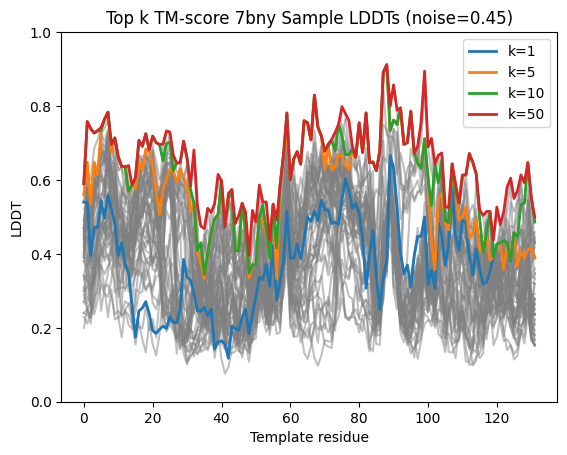

In [24]:
from pathlib import Path
from Bio.PDB import PDBParser, is_aa
import numpy as np

alpha_1 = list("ARNDCQEGHILKMFPSTWYVX-")
states = len(alpha_1)
alpha_3 = ['ALA','ARG','ASN','ASP','CYS','GLN','GLU','GLY','HIS','ILE',
            'LEU','LYS','MET','PHE','PRO','SER','THR','TRP','TYR','VAL','UNK','GAP']

aa_1_N = {a:n for n,a in enumerate(alpha_1)}
aa_3_N = {a:n for n,a in enumerate(alpha_3)}
aa_N_1 = {n:a for n,a in enumerate(alpha_1)}
aa_N_3 = {n:a for n,a in enumerate(alpha_3)}
aa_1_3 = {a:b for a,b in zip(alpha_1,alpha_3)}
aa_3_1 = {b:a for a,b in zip(alpha_1,alpha_3)}


def get_atom_pdb(pdb_file, chain_id, atom_id="CA", model_id=0):
    pdb_parser = PDBParser(QUIET=True)
    pdb = pdb_parser.get_structure("", pdb_file)
    model = pdb[model_id]
    chain = model[chain_id]
    seq = []
    coords = []
    for res in chain.get_residues():
        if is_aa(res) and res.get_resname() in aa_3_1:
            # Append the coordinates of each atom
            # Skip any without a CA atom
            ca_coord = [atom.get_coord() for atom in res if atom.name == atom_id]
            if len(ca_coord) > 0:
                coords.append(ca_coord[0])
                seq.append(aa_3_1[res.get_resname()])
    # Convert coordinates list to numpy array
    coords = np.array(coords)
    return coords, seq

# Implement local distance difference test with cutoff of 0.5A, 1.0A, 2.0A, 4.0A. The global cutoff for averaging is 15A.
def compute_lddt(gt_coord, template_coord, cutoff=15, local_cutoff=[0.5, 1.0, 2.0, 4.0]):
    gt_dist = np.linalg.norm(gt_coord[None, :, :] - gt_coord[:, None, :], axis=-1)
    template_dist = np.linalg.norm(template_coord[None, :, :] - template_coord[:, None, :], axis=-1)
    global_dist_mask = gt_dist < cutoff
    dist_diff = np.abs(gt_dist - template_dist)
    local_dist_mask = np.zeros((len(local_cutoff), len(gt_coord), len(gt_coord)))
    for i, cutoff in enumerate(local_cutoff):
        local_dist_mask[i] = dist_diff < cutoff
    lddt = np.mean(local_dist_mask, axis=0)
    lddt = (global_dist_mask * lddt).sum(axis=0) / global_dist_mask.sum(axis=0)
    return lddt

gt_pdb = "/home/jupyter-chenxi/data/7bny_example/7bny.pdb"
gt_coord, gt_seq = get_atom_pdb(gt_pdb, "A")
top_k = 50
template_pdbs = seq_finetune_all_purge_7bny_noise_045_aln_df.sort_values(by="TM1", ascending=False).head(top_k)["PDBchain2"]
lddt_list = []
for template_pdb in template_pdbs:
    template_pdb = Path("/home/jupyter-chenxi/proteina/inference/inference_seq_cond_sampling_finetune-all_21-seq_purge-7bny_045-noise/7bny_A") / template_pdb.split(":")[0][1:]
    template_coord, template_seq = get_atom_pdb(template_pdb, "A")

    lddt = compute_lddt(gt_coord, template_coord, cutoff=15, local_cutoff=[0.5, 1.0, 2.0, 4.0])
    lddt_list.append(lddt)

for i in range(len(lddt_list)): plt.plot(lddt_list[i], alpha=0.5, color="gray")
for k in [1 , 5, 10, 50]: plt.plot(np.max(lddt_list[:k], axis=0), label=f"k={k}", linewidth=2)
plt.xlabel("Template residue")
plt.ylabel("LDDT")
plt.ylim(0, 1)
plt.title(f"Top k TM-score 7bny Sample LDDTs (noise=0.45)")
plt.legend()
plt.show()


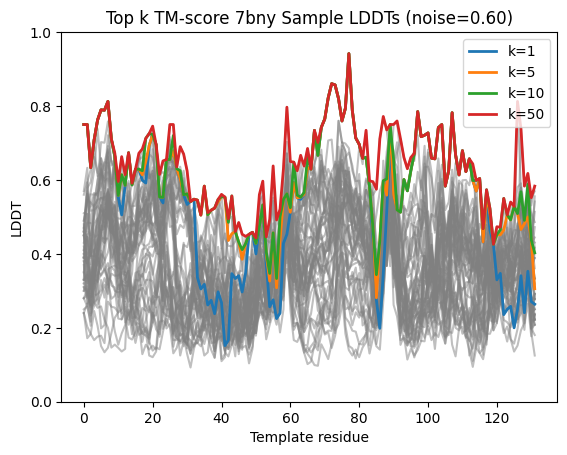

In [25]:
from pathlib import Path
from Bio.PDB import PDBParser, is_aa
import numpy as np

alpha_1 = list("ARNDCQEGHILKMFPSTWYVX-")
states = len(alpha_1)
alpha_3 = ['ALA','ARG','ASN','ASP','CYS','GLN','GLU','GLY','HIS','ILE',
            'LEU','LYS','MET','PHE','PRO','SER','THR','TRP','TYR','VAL','UNK','GAP']

aa_1_N = {a:n for n,a in enumerate(alpha_1)}
aa_3_N = {a:n for n,a in enumerate(alpha_3)}
aa_N_1 = {n:a for n,a in enumerate(alpha_1)}
aa_N_3 = {n:a for n,a in enumerate(alpha_3)}
aa_1_3 = {a:b for a,b in zip(alpha_1,alpha_3)}
aa_3_1 = {b:a for a,b in zip(alpha_1,alpha_3)}


def get_atom_pdb(pdb_file, chain_id, atom_id="CA", model_id=0):
    pdb_parser = PDBParser(QUIET=True)
    pdb = pdb_parser.get_structure("", pdb_file)
    model = pdb[model_id]
    chain = model[chain_id]
    seq = []
    coords = []
    for res in chain.get_residues():
        if is_aa(res) and res.get_resname() in aa_3_1:
            # Append the coordinates of each atom
            # Skip any without a CA atom
            ca_coord = [atom.get_coord() for atom in res if atom.name == atom_id]
            if len(ca_coord) > 0:
                coords.append(ca_coord[0])
                seq.append(aa_3_1[res.get_resname()])
    # Convert coordinates list to numpy array
    coords = np.array(coords)
    return coords, seq

# Implement local distance difference test with cutoff of 0.5A, 1.0A, 2.0A, 4.0A. The global cutoff for averaging is 15A.
def compute_lddt(gt_coord, template_coord, cutoff=15, local_cutoff=[0.5, 1.0, 2.0, 4.0]):
    gt_dist = np.linalg.norm(gt_coord[None, :, :] - gt_coord[:, None, :], axis=-1)
    template_dist = np.linalg.norm(template_coord[None, :, :] - template_coord[:, None, :], axis=-1)
    global_dist_mask = gt_dist < cutoff
    dist_diff = np.abs(gt_dist - template_dist)
    local_dist_mask = np.zeros((len(local_cutoff), len(gt_coord), len(gt_coord)))
    for i, cutoff in enumerate(local_cutoff):
        local_dist_mask[i] = dist_diff < cutoff
    lddt = np.mean(local_dist_mask, axis=0)
    lddt = (global_dist_mask * lddt).sum(axis=0) / global_dist_mask.sum(axis=0)
    return lddt

gt_pdb = "/home/jupyter-chenxi/data/7bny_example/7bny.pdb"
gt_coord, gt_seq = get_atom_pdb(gt_pdb, "A")
top_k = 50
template_pdbs = seq_finetune_all_purge_7bny_noise_060_aln_df.sort_values(by="TM1", ascending=False).head(top_k)["PDBchain2"]
lddt_list = []
for template_pdb in template_pdbs:
    template_pdb = Path("/home/jupyter-chenxi/proteina/inference/inference_seq_cond_sampling_finetune-all_21-seq_purge-7bny_060-noise/7bny_A") / template_pdb.split(":")[0][1:]
    template_coord, template_seq = get_atom_pdb(template_pdb, "A")

    lddt = compute_lddt(gt_coord, template_coord, cutoff=15, local_cutoff=[0.5, 1.0, 2.0, 4.0])
    lddt_list.append(lddt)

for i in range(len(lddt_list)): plt.plot(lddt_list[i], alpha=0.5, color="gray")
for k in [1 , 5, 10, 50]: plt.plot(np.max(lddt_list[:k], axis=0), label=f"k={k}", linewidth=2)
plt.xlabel("Template residue")
plt.ylabel("LDDT")
plt.ylim(0, 1)
plt.title(f"Top k TM-score 7bny Sample LDDTs (noise=0.60)")
plt.legend()
plt.show()


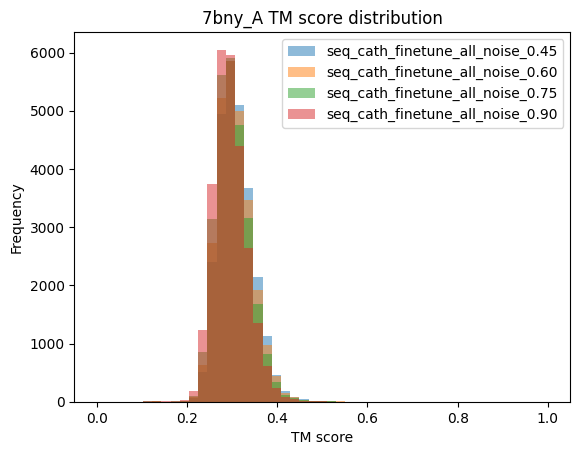

In [15]:
seq_cath_finetune_all_purge_7bny_noise_045_aln_df = pd.read_csv("/home/jupyter-chenxi/proteina/inference/inference_seq_cath_cond_sampling_finetune-all_21-seq_purge-7bny_045-noise/7bny_A/aln.tsv", sep="\t")
seq_cath_finetune_all_purge_7bny_noise_060_aln_df = pd.read_csv("/home/jupyter-chenxi/proteina/inference/inference_seq_cath_cond_sampling_finetune-all_21-seq_purge-7bny_060-noise/7bny_A/aln.tsv", sep="\t")
seq_cath_finetune_all_purge_7bny_noise_075_aln_df = pd.read_csv("/home/jupyter-chenxi/proteina/inference/inference_seq_cath_cond_sampling_finetune-all_21-seq_purge-7bny_075-noise/7bny_A/aln.tsv", sep="\t")
seq_cath_finetune_all_purge_7bny_noise_090_aln_df = pd.read_csv("/home/jupyter-chenxi/proteina/inference/inference_seq_cath_cond_sampling_finetune-all_21-seq_purge-7bny_090-noise/7bny_A/aln.tsv", sep="\t")

plt.hist(seq_cath_finetune_all_purge_7bny_noise_045_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_cath_finetune_all_noise_0.45")
plt.hist(seq_cath_finetune_all_purge_7bny_noise_060_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_cath_finetune_all_noise_0.60")
plt.hist(seq_cath_finetune_all_purge_7bny_noise_075_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_cath_finetune_all_noise_0.75")
plt.hist(seq_cath_finetune_all_purge_7bny_noise_090_aln_df["TM1"].to_numpy(), alpha=0.5, bins=np.linspace(0, 1, 50), label="seq_cath_finetune_all_noise_0.90")
plt.xlabel("TM score")
plt.ylabel("Frequency")
plt.title("7bny_A TM score distribution")
plt.legend()
plt.show()


In [4]:
print(seq_cath_finetune_all_purge_7bny_noise_045_aln_df.sort_values(by="TM1", ascending=False).head(3)["TM1"])
print(seq_cath_finetune_all_purge_7bny_noise_060_aln_df.sort_values(by="TM1", ascending=False).head(3)["TM1"])
print(seq_cath_finetune_all_purge_7bny_noise_075_aln_df.sort_values(by="TM1", ascending=False).head(3)["TM1"])
print(seq_cath_finetune_all_purge_7bny_noise_090_aln_df.sort_values(by="TM1", ascending=False).head(3)["TM1"])


8540     0.6071
1979     0.6020
20722    0.5966
Name: TM1, dtype: float64
21495    0.6264
4863     0.5840
20722    0.5511
Name: TM1, dtype: float64
26212    0.6005
4863     0.5693
18253    0.5426
Name: TM1, dtype: float64
26212    0.5819
7070     0.5569
4863     0.5298
Name: TM1, dtype: float64


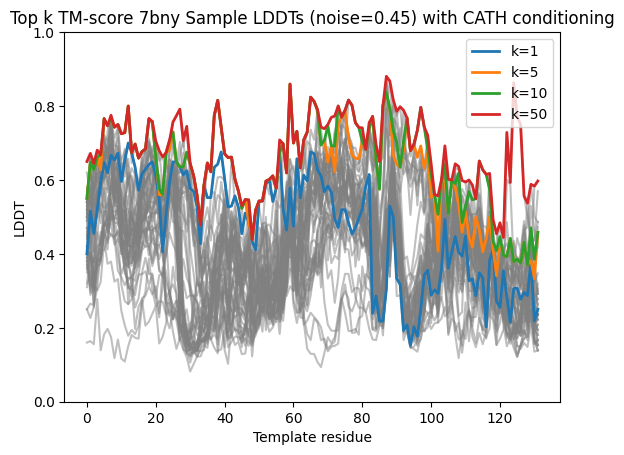

In [27]:
from pathlib import Path
from Bio.PDB import PDBParser, is_aa
import numpy as np

alpha_1 = list("ARNDCQEGHILKMFPSTWYVX-")
states = len(alpha_1)
alpha_3 = ['ALA','ARG','ASN','ASP','CYS','GLN','GLU','GLY','HIS','ILE',
            'LEU','LYS','MET','PHE','PRO','SER','THR','TRP','TYR','VAL','UNK','GAP']

aa_1_N = {a:n for n,a in enumerate(alpha_1)}
aa_3_N = {a:n for n,a in enumerate(alpha_3)}
aa_N_1 = {n:a for n,a in enumerate(alpha_1)}
aa_N_3 = {n:a for n,a in enumerate(alpha_3)}
aa_1_3 = {a:b for a,b in zip(alpha_1,alpha_3)}
aa_3_1 = {b:a for a,b in zip(alpha_1,alpha_3)}


def get_atom_pdb(pdb_file, chain_id, atom_id="CA", model_id=0):
    pdb_parser = PDBParser(QUIET=True)
    pdb = pdb_parser.get_structure("", pdb_file)
    model = pdb[model_id]
    chain = model[chain_id]
    seq = []
    coords = []
    for res in chain.get_residues():
        if is_aa(res) and res.get_resname() in aa_3_1:
            # Append the coordinates of each atom
            # Skip any without a CA atom
            ca_coord = [atom.get_coord() for atom in res if atom.name == atom_id]
            if len(ca_coord) > 0:
                coords.append(ca_coord[0])
                seq.append(aa_3_1[res.get_resname()])
    # Convert coordinates list to numpy array
    coords = np.array(coords)
    return coords, seq

# Implement local distance difference test with cutoff of 0.5A, 1.0A, 2.0A, 4.0A. The global cutoff for averaging is 15A.
def compute_lddt(gt_coord, template_coord, cutoff=15, local_cutoff=[0.5, 1.0, 2.0, 4.0]):
    gt_dist = np.linalg.norm(gt_coord[None, :, :] - gt_coord[:, None, :], axis=-1)
    template_dist = np.linalg.norm(template_coord[None, :, :] - template_coord[:, None, :], axis=-1)
    global_dist_mask = gt_dist < cutoff
    dist_diff = np.abs(gt_dist - template_dist)
    local_dist_mask = np.zeros((len(local_cutoff), len(gt_coord), len(gt_coord)))
    for i, cutoff in enumerate(local_cutoff):
        local_dist_mask[i] = dist_diff < cutoff
    lddt = np.mean(local_dist_mask, axis=0)
    lddt = (global_dist_mask * lddt).sum(axis=0) / global_dist_mask.sum(axis=0)
    return lddt

gt_pdb = "/home/jupyter-chenxi/data/7bny_example/7bny.pdb"
gt_coord, gt_seq = get_atom_pdb(gt_pdb, "A")
top_k = 50
template_pdbs = seq_cath_finetune_all_purge_7bny_noise_045_aln_df.sort_values(by="TM1", ascending=False).head(top_k)["PDBchain2"]
lddt_list = []
for template_pdb in template_pdbs:
    template_pdb = Path("/home/jupyter-chenxi/proteina/inference/inference_seq_cath_cond_sampling_finetune-all_21-seq_purge-7bny_045-noise/7bny_A") / template_pdb.split(":")[0][1:]
    template_coord, template_seq = get_atom_pdb(template_pdb, "A")

    lddt = compute_lddt(gt_coord, template_coord, cutoff=15, local_cutoff=[0.5, 1.0, 2.0, 4.0])
    lddt_list.append(lddt)

for i in range(len(lddt_list)): plt.plot(lddt_list[i], alpha=0.5, color="gray")
for k in [1 , 5, 10, 50]: plt.plot(np.max(lddt_list[:k], axis=0), label=f"k={k}", linewidth=2)
plt.xlabel("Template residue")
plt.ylabel("LDDT")
plt.ylim(0, 1)
plt.title(f"Top k TM-score 7bny Sample LDDTs (noise=0.45) with CATH conditioning")
plt.legend()
plt.show()


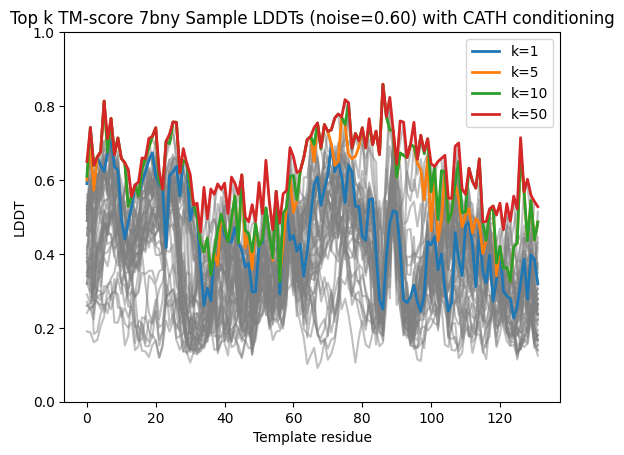

In [28]:
from pathlib import Path
from Bio.PDB import PDBParser, is_aa
import numpy as np

alpha_1 = list("ARNDCQEGHILKMFPSTWYVX-")
states = len(alpha_1)
alpha_3 = ['ALA','ARG','ASN','ASP','CYS','GLN','GLU','GLY','HIS','ILE',
            'LEU','LYS','MET','PHE','PRO','SER','THR','TRP','TYR','VAL','UNK','GAP']

aa_1_N = {a:n for n,a in enumerate(alpha_1)}
aa_3_N = {a:n for n,a in enumerate(alpha_3)}
aa_N_1 = {n:a for n,a in enumerate(alpha_1)}
aa_N_3 = {n:a for n,a in enumerate(alpha_3)}
aa_1_3 = {a:b for a,b in zip(alpha_1,alpha_3)}
aa_3_1 = {b:a for a,b in zip(alpha_1,alpha_3)}


def get_atom_pdb(pdb_file, chain_id, atom_id="CA", model_id=0):
    pdb_parser = PDBParser(QUIET=True)
    pdb = pdb_parser.get_structure("", pdb_file)
    model = pdb[model_id]
    chain = model[chain_id]
    seq = []
    coords = []
    for res in chain.get_residues():
        if is_aa(res) and res.get_resname() in aa_3_1:
            # Append the coordinates of each atom
            # Skip any without a CA atom
            ca_coord = [atom.get_coord() for atom in res if atom.name == atom_id]
            if len(ca_coord) > 0:
                coords.append(ca_coord[0])
                seq.append(aa_3_1[res.get_resname()])
    # Convert coordinates list to numpy array
    coords = np.array(coords)
    return coords, seq

# Implement local distance difference test with cutoff of 0.5A, 1.0A, 2.0A, 4.0A. The global cutoff for averaging is 15A.
def compute_lddt(gt_coord, template_coord, cutoff=15, local_cutoff=[0.5, 1.0, 2.0, 4.0]):
    gt_dist = np.linalg.norm(gt_coord[None, :, :] - gt_coord[:, None, :], axis=-1)
    template_dist = np.linalg.norm(template_coord[None, :, :] - template_coord[:, None, :], axis=-1)
    global_dist_mask = gt_dist < cutoff
    dist_diff = np.abs(gt_dist - template_dist)
    local_dist_mask = np.zeros((len(local_cutoff), len(gt_coord), len(gt_coord)))
    for i, cutoff in enumerate(local_cutoff):
        local_dist_mask[i] = dist_diff < cutoff
    lddt = np.mean(local_dist_mask, axis=0)
    lddt = (global_dist_mask * lddt).sum(axis=0) / global_dist_mask.sum(axis=0)
    return lddt

gt_pdb = "/home/jupyter-chenxi/data/7bny_example/7bny.pdb"
gt_coord, gt_seq = get_atom_pdb(gt_pdb, "A")
top_k = 50
template_pdbs = seq_cath_finetune_all_purge_7bny_noise_060_aln_df.sort_values(by="TM1", ascending=False).head(top_k)["PDBchain2"]
lddt_list = []
for template_pdb in template_pdbs:
    template_pdb = Path("/home/jupyter-chenxi/proteina/inference/inference_seq_cath_cond_sampling_finetune-all_21-seq_purge-7bny_060-noise/7bny_A") / template_pdb.split(":")[0][1:]
    template_coord, template_seq = get_atom_pdb(template_pdb, "A")

    lddt = compute_lddt(gt_coord, template_coord, cutoff=15, local_cutoff=[0.5, 1.0, 2.0, 4.0])
    lddt_list.append(lddt)

for i in range(len(lddt_list)): plt.plot(lddt_list[i], alpha=0.5, color="gray")
for k in [1 , 5, 10, 50]: plt.plot(np.max(lddt_list[:k], axis=0), label=f"k={k}", linewidth=2)
plt.xlabel("Template residue")
plt.ylabel("LDDT")
plt.ylim(0, 1)
plt.title(f"Top k TM-score 7bny Sample LDDTs (noise=0.60) with CATH conditioning")
plt.legend()
plt.show()


In [ ]:
from pathlib import Path
from Bio.PDB import PDBParser, is_aa
import numpy as np

alpha_1 = list("ARNDCQEGHILKMFPSTWYVX-")
states = len(alpha_1)
alpha_3 = ['ALA','ARG','ASN','ASP','CYS','GLN','GLU','GLY','HIS','ILE',
            'LEU','LYS','MET','PHE','PRO','SER','THR','TRP','TYR','VAL','UNK','GAP']

aa_1_N = {a:n for n,a in enumerate(alpha_1)}
aa_3_N = {a:n for n,a in enumerate(alpha_3)}
aa_N_1 = {n:a for n,a in enumerate(alpha_1)}
aa_N_3 = {n:a for n,a in enumerate(alpha_3)}
aa_1_3 = {a:b for a,b in zip(alpha_1,alpha_3)}
aa_3_1 = {b:a for a,b in zip(alpha_1,alpha_3)}


def get_atom_pdb(pdb_file, chain_id, atom_id="CA", model_id=0):
    pdb_parser = PDBParser(QUIET=True)
    pdb = pdb_parser.get_structure("", pdb_file)
    model = pdb[model_id]
    chain = model[chain_id]
    seq = []
    coords = []
    for res in chain.get_residues():
        if is_aa(res) and res.get_resname() in aa_3_1:
            # Append the coordinates of each atom
            # Skip any without a CA atom
            ca_coord = [atom.get_coord() for atom in res if atom.name == atom_id]
            if len(ca_coord) > 0:
                coords.append(ca_coord[0])
                seq.append(aa_3_1[res.get_resname()])
    # Convert coordinates list to numpy array
    coords = np.array(coords)
    return coords, seq

# Implement local distance difference test with cutoff of 0.5A, 1.0A, 2.0A, 4.0A. The global cutoff for averaging is 15A.
def lddt(gt_coord, template_coord, cutoff=15, local_cutoff=[0.5, 1.0, 2.0, 4.0]):
    gt_dist = np.linalg.norm(gt_coord[None, :, :] - gt_coord[:, None, :], axis=-1)
    template_dist = np.linalg.norm(template_coord[None, :, :] - template_coord[:, None, :], axis=-1)
    global_dist_mask = gt_dist < cutoff
    dist_diff = np.abs(gt_dist - template_dist)
    local_dist_mask = np.zeros((len(local_cutoff), len(gt_coord), len(gt_coord)))
    for i, cutoff in enumerate(local_cutoff):
        local_dist_mask[i] = dist_diff < cutoff
    lddt = np.mean(local_dist_mask, axis=0)
    lddt = (global_dist_mask * lddt).sum(axis=0) / global_dist_mask.sum(axis=0)
    return lddt

gt_pdb = "/home/jupyter-chenxi/data/7bny_example/7bny.pdb"
template_pdb = Path("/home/jupyter-chenxi/proteina/inference/inference_seq_cath_cond_sampling_finetune-all_21-seq_purge-7bny_045-noise/7bny_A") / Path(seq_cath_finetune_all_purge_7bny_noise_045_aln_df.sort_values(by="TM1", ascending=False).head(3)["PDBchain2"].iloc[0].split(":")[0][1:])

gt_coord, gt_seq = get_atom_pdb(gt_pdb, "A")
template_coord, template_seq = get_atom_pdb(template_pdb, "A")

lddt = lddt(gt_coord, template_coord, cutoff=15, local_cutoff=[0.5, 1.0, 2.0, 4.0])

plt.plot(lddt)
plt.xlabel("Template residue")
plt.ylabel("LDDT")
plt.show()


In [5]:
print(seq_cath_finetune_all_purge_7bny_noise_045_aln_df.sort_values(by="TM1", ascending=False).head(3)["PDBchain2"].iloc[0])
print(seq_cath_finetune_all_purge_7bny_noise_060_aln_df.sort_values(by="TM1", ascending=False).head(3)["PDBchain2"].iloc[0])


/./7bny_A_cath_2.20.25.290_4.pdb:A
/./7bny_A_cath_4.10.49.10_7.pdb:A


In [6]:
print(seq_cath_finetune_all_purge_7bny_noise_060_aln_df[seq_cath_finetune_all_purge_7bny_noise_060_aln_df["PDBchain2"].str.contains("4.10.49.10")])


                                              #PDBchain1  \
21488  /home/jupyter-chenxi/proteina/data/pdb_train/r...   
21489  /home/jupyter-chenxi/proteina/data/pdb_train/r...   
21490  /home/jupyter-chenxi/proteina/data/pdb_train/r...   
21491  /home/jupyter-chenxi/proteina/data/pdb_train/r...   
21492  /home/jupyter-chenxi/proteina/data/pdb_train/r...   
21493  /home/jupyter-chenxi/proteina/data/pdb_train/r...   
21494  /home/jupyter-chenxi/proteina/data/pdb_train/r...   
21495  /home/jupyter-chenxi/proteina/data/pdb_train/r...   

                               PDBchain2     TM1     TM2  RMSD    ID1    ID2  \
21488  /./7bny_A_cath_4.10.49.10_0.pdb:A  0.2998  0.2998  4.37  0.220  0.220   
21489  /./7bny_A_cath_4.10.49.10_1.pdb:A  0.3365  0.3365  4.48  0.061  0.061   
21490  /./7bny_A_cath_4.10.49.10_2.pdb:A  0.2821  0.2821  4.31  0.045  0.045   
21491  /./7bny_A_cath_4.10.49.10_3.pdb:A  0.3510  0.3510  3.40  0.182  0.182   
21492  /./7bny_A_cath_4.10.49.10_4.pdb:A  0.3285  0.3285  4

In [8]:
split_df = pd.DataFrame(["2.40.128"], columns=["cath_code"])
split_df.to_csv(f"/home/jupyter-chenxi/proteina/data/pdb_train/test_cath_code.csv", index=False)

In [5]:
cath_transform = CATHLabelTransform(root_dir="/home/jupyter-chenxi/proteina/data/cathdata/")
pdbchain_to_cathid_mapping = cath_transform.pdbchain_to_cathid_mapping
cathid_to_cathcode_mapping = cath_transform.cathid_to_cathcode_mapping
cathid_to_segment_mapping = cath_transform.cathid_to_segment_mapping


2025-05-12 16:57:16.148 | INFO     | proteinfoundation.datasets.transforms:__init__:231 - Processing Uniprot/PDB CATH map...
2025-05-12 16:57:16.713 | INFO     | proteinfoundation.datasets.transforms:__init__:233 - Processing CATH ID to CATH code map...


In [6]:
print(len(pdbchain_to_cathid_mapping))
print(list(pdbchain_to_cathid_mapping.keys())[:10])
print(pdbchain_to_cathid_mapping[list(pdbchain_to_cathid_mapping.keys())[1]])


296383
['PDB_CHAIN', '101m_A', '102l_A', '102m_A', '103l_A', '103m_A', '104l_A', '104l_B', '104m_A', '105m_A']
['101mA00']


In [7]:
print(len(cathid_to_cathcode_mapping))
print(list(cathid_to_cathcode_mapping.keys())[:10])
print(cathid_to_cathcode_mapping[list(cathid_to_cathcode_mapping.keys())[1]])


601328
['101mA00', '102lA00', '102mA00', '103lA00', '103mA00', '104lA00', '104lB00', '104mA00', '105mA00', '106mA00']
1.10.530.40


In [8]:
print(len(cathid_to_segment_mapping))
print(list(cathid_to_segment_mapping.keys())[:10])
print(cathid_to_segment_mapping[list(cathid_to_segment_mapping.keys())[1]])


601328
['101mA00', '102lA00', '102mA00', '103lA00', '103mA00', '104lA00', '104lB00', '104mA00', '105mA00', '106mA00']
[('A', '1', '162')]


In [16]:
print(len(list(filter(lambda x: x[-2:] != "00", list(cathid_to_cathcode_mapping.keys())))))


396636


In [29]:
for split in ["train", "val", "test"]:
    pdbs = pdb_datamodule._get_dataset(split).pdb_codes
    chains = pdb_datamodule._get_dataset(split).chains
    pdb_chains = set([f"{pdb}{chain}" for pdb, chain in zip(pdbs, chains)])
    cath = set()
    for cathid, cathcode in tqdm(cathid_to_cathcode_mapping.items()):
        if cathid[:5] in pdb_chains:
            cath.add(cathcode)
    print(f"{split} has {len(cath)} unique CATH codes")
    split_df = pd.DataFrame(list(cath), columns=["cath_code"])
    split_df.to_csv(f"/home/jupyter-chenxi/proteina/data/pdb_train/cath_codes_{split}_0.5_df_pdb_f1_minl50_maxl256_mtprotein_etdiffractionEM_minoNone_maxoNone_minr0.0_maxr5.0_hl_rl_rnsrTrue_rpuTrue_l_rcuFalse.csv", index=False)


100%|██████████| 601328/601328 [00:00<00:00, 1730785.42it/s]


train has 3330 unique CATH codes


100%|██████████| 601328/601328 [00:00<00:00, 2671927.32it/s]


val has 213 unique CATH codes


100%|██████████| 601328/601328 [00:00<00:00, 2678277.25it/s]

test has 16 unique CATH codes


In [2]:
L.seed_everything(43)
version_base = hydra.__version__
config_path = "/home/jupyter-chenxi/proteina/configs/datasets_config"
hydra.initialize_config_dir(config_dir=f"{config_path}/pdb", version_base=version_base)

cfg = hydra.compose(
    config_name="pdb_train_S30_purge-7bny",
    return_hydra_config=True,
)
pdb_datamodule = hydra.utils.instantiate(cfg.datamodule)
pdb_datamodule.prepare_data()
pdb_datamodule.setup("fit")
pdb_train_dataloader = pdb_datamodule.train_dataloader()


Seed set to 43
2025-06-04 16:47:15.738 | INFO     | proteinfoundation.datasets.transforms:__init__:231 - Processing Uniprot/PDB CATH map...
2025-06-04 16:47:16.289 | INFO     | proteinfoundation.datasets.transforms:__init__:233 - Processing CATH ID to CATH code map...
2025-06-04 16:47:18.380 | INFO     | proteinfoundation.datasets.pdb_data:prepare_data:518 - df_pdb_f1_minl50_maxl256_mtprotein_etdiffractionEM_minoNone_maxoNone_minr0.0_maxr5.0_hl_rl_rnsrTrue_rpuTrue_l_rcuFalse_ex8.csv already exists, skipping data selection and processing stage.
2025-06-04 16:47:18.380 | INFO     | proteinfoundation.datasets.pdb_data:setup:610 - Loading dataset csv from df_pdb_f1_minl50_maxl256_mtprotein_etdiffractionEM_minoNone_maxoNone_minr0.0_maxr5.0_hl_rl_rnsrTrue_rpuTrue_l_rcuFalse_ex8.csv
2025-06-04 16:47:19.017 | INFO     | proteinfoundation.datasets.pdb_data:split_data:286 - Splitting dataset via sequence-similarity split into [0.98, 0.019, 0.001]...
2025-06-04 16:47:19.018 | INFO     | proteinfo

In [7]:
pt_name = "/home/jupyter-chenxi/proteina/data/pdb_train/processed/4jnj_A.pt"
load_pt = torch.load(pt_name)
print(load_pt.residue_type)


tensor([ 7,  0,  6,  0,  7,  9, 16,  7, 16, 17, 18,  2,  5, 15,  7, 15, 16, 13,
        16, 19, 16,  0,  7,  0,  3,  7,  2, 10, 16,  7,  5, 18,  6,  2,  1,  0,
         5,  7, 16,  7,  4,  5,  2, 15, 14, 18, 16, 10, 16,  7,  1, 18,  2,  7,
        16, 11, 10,  6, 17,  1, 19,  6, 17,  2,  2, 15, 16,  6,  2,  4,  8, 15,
         1, 16,  6, 17,  1,  7,  5, 18,  5,  7,  7,  0,  6,  0,  1,  9,  2, 16,
         5, 17,  2, 10, 16, 18,  6,  7,  7, 15,  7, 14,  0, 16,  6,  5,  7,  5,
         3, 16, 13, 16, 11, 19, 11])


/tmp/ipykernel_3145877/2087316723.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_pt = torch.load(pt_name)


In [3]:
train_id = pdb_datamodule._get_dataset("train").file_names
train_id

['2pfs_A',
 '3tnj_A',
 '4wny_A',
 '3fia_A',
 '4deq_A',
 '1kex_A',
 '2qqn_A',
 '3i97_A',
 '3i97_B',
 '4deq_B',
 '4rn5_A',
 '5c7g_A',
 '5ijr_A',
 '5ijr_B',
 '5iyy_A',
 '5iyy_B',
 '5j1x_A',
 '5j1x_B',
 '5j1x_C',
 '5j1x_D',
 '5jgi_A',
 '5jgi_B',
 '5jgq_A',
 '5jgq_B',
 '5jhk_A',
 '5jhk_B',
 '6fmc_A',
 '6fmf_A',
 '6tkk_A',
 '7jjc_A',
 '7jjc_B',
 '7jjc_C',
 '7jjc_D',
 '7o1n_A',
 '4qds_A',
 '4qds_B',
 '5dn2_A',
 '5dn2_B',
 '5dn2_C',
 '5dn2_D',
 '5dq0_A',
 '6tdb_A',
 '6tdb_B',
 '6tdb_C',
 '6tdb_D',
 '6tjt_A',
 '6tjt_B',
 '1czs_A',
 '1czt_A',
 '1czv_A',
 '1czv_B',
 '2pqs_A',
 '2pqs_B',
 '2pqs_C',
 '2pqs_D',
 '3bn6_A',
 '2wuh_A',
 '7azb_A',
 '5y4m_A',
 '7xdi_E',
 '5axk_A',
 '5axk_B',
 '5axl_A',
 '5axl_B',
 '5axm_A',
 '5axm_B',
 '5axn_A',
 '5axn_B',
 '1hqv_A',
 '2zn8_A',
 '2zn9_A',
 '2zn9_B',
 '2znd_A',
 '2zne_A',
 '2zne_B',
 '2zrs_A',
 '2zrs_B',
 '2zrs_C',
 '2zrs_D',
 '2zrs_E',
 '2zrs_F',
 '2zrs_G',
 '2zrs_H',
 '2zrt_A',
 '2zrt_B',
 '2zrt_C',
 '2zrt_D',
 '2zrt_E',
 '2zrt_F',
 '2zrt_G',
 '2zrt_H',

In [4]:
val_id = pdb_datamodule._get_dataset("val").file_names
val_id

['2vcp_D',
 '2vcp_E',
 '5d27_A',
 '5d3v_A',
 '5d3v_B',
 '5d3w_A',
 '5d3w_B',
 '5d3x_A',
 '5d3x_B',
 '5d3y_A',
 '5d3y_B',
 '6bnm_A',
 '2j43_A',
 '2j43_B',
 '2j44_A',
 '3iab_B',
 '6agb_G',
 '6ah3_G',
 '6w6v_G',
 '7c79_G',
 '7c7a_G',
 '5to5_A',
 '5to5_B',
 '5to6_A',
 '5to6_B',
 '5to6_C',
 '5to6_D',
 '5to7_A',
 '5to7_B',
 '5to7_C',
 '5to7_D',
 '5tvb_A',
 '5tvb_B',
 '7xge_A',
 '4oyd_B',
 '4oyd_D',
 '5jsb_B',
 '5jsb_D',
 '5jsb_F',
 '5jsb_H',
 '5jsb_J',
 '5jsb_L',
 '7xge_C',
 '7xge_E',
 '7xge_G',
 '7xgf_A',
 '7xgf_D',
 '7xgg_A',
 '7xgg_D',
 '5jsn_B',
 '5jsn_D',
 '8eja_B',
 '8eja_A',
 '3gz5_A',
 '3gz5_B',
 '3gz6_A',
 '3gz6_B',
 '3gz8_A',
 '3gz8_B',
 '3gz8_C',
 '3gz8_D',
 '7b26_C',
 '7b2d_A',
 '7b28_F',
 '7b28_A',
 '7b28_B',
 '7b28_C',
 '7b28_D',
 '7b28_E',
 '7b28_G',
 '7b28_H',
 '7b29_A',
 '7b2a_A',
 '1ecs_A',
 '1ecs_B',
 '1ewj_A',
 '1ewj_B',
 '1ewj_C',
 '1ewj_D',
 '1ewj_E',
 '1ewj_F',
 '1ewj_G',
 '1ewj_H',
 '3bnk_A',
 '3bnk_B',
 '3n7c_A',
 '3n7c_B',
 '3oan_A',
 '3tj3_C',
 '3tj3_D',
 '6gfb_A',

In [6]:
pdb_datamodule.df_data[pdb_datamodule.df_data["pdb"] == "1ubq"]

,id,pdb,chain,length,molecule_type,name,sequence,split,n_chains,ligands,source,resolution,deposition_date,experiment_type,pdb_file_available
24932,1ubq_A,1ubq,A,76,protein,UBIQUITIN,MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFA...,NaN,1,[],Homo sapiens,1.8,1987-01-02,diffraction,True


In [7]:
print(list(filter(lambda x: x in ["1ubq_A"], pdb_datamodule._get_dataset("train").file_names)))

['1ubq_A']


In [8]:
# print(pdb_datamodule.dataselector.exclude_ids, pdb_datamodule._get_dataset("train").file_names)
print(list(filter(lambda x: x in ["7bny_A", "7bny_B", "7bny_C", "7bny_D"], pdb_datamodule._get_dataset("train").file_names)))

[]


In [4]:
pdb_datamodule.df_data[pdb_datamodule.df_data["pdb"] == "7ll9"]

,id,pdb,chain,length,molecule_type,name,sequence,split,n_chains,ligands,source,resolution,deposition_date,experiment_type,pdb_file_available
231536,7ll9_A,7ll9,A,103,protein,Isoform L-VEGF189 of Vascular endothelial grow...,SGQNHHEVVKFMDVYQRSYCHPIETLVDIFQEYPDEIEYIFKPSCV...,NaN,8,"['DAL', 'DAR', 'DAS', 'DGL', 'DGN', 'DHI', 'DI...",Homo sapiens; SYNTHETIC CONSTRUCT,2.9,2021-02-03,diffraction,True
231537,7ll9_B,7ll9,B,103,protein,Isoform L-VEGF189 of Vascular endothelial grow...,SGQNHHEVVKFMDVYQRSYCHPIETLVDIFQEYPDEIEYIFKPSCV...,NaN,8,"['DAL', 'DAR', 'DAS', 'DGL', 'DGN', 'DHI', 'DI...",Homo sapiens; SYNTHETIC CONSTRUCT,2.9,2021-02-03,diffraction,True
231538,7ll9_E,7ll9,E,103,protein,Isoform L-VEGF189 of Vascular endothelial grow...,SGQNHHEVVKFMDVYQRSYCHPIETLVDIFQEYPDEIEYIFKPSCV...,NaN,8,"['DAL', 'DAR', 'DAS', 'DGL', 'DGN', 'DHI', 'DI...",Homo sapiens; SYNTHETIC CONSTRUCT,2.9,2021-02-03,diffraction,True
231539,7ll9_F,7ll9,F,103,protein,Isoform L-VEGF189 of Vascular endothelial grow...,SGQNHHEVVKFMDVYQRSYCHPIETLVDIFQEYPDEIEYIFKPSCV...,NaN,8,"['DAL', 'DAR', 'DAS', 'DGL', 'DGN', 'DHI', 'DI...",Homo sapiens; SYNTHETIC CONSTRUCT,2.9,2021-02-03,diffraction,True


In [5]:
print(pdb_train_dataloader.dataset[0])
print(pdb_train_dataloader.dataset[0].residues)
print(pdb_train_dataloader.dataset[0].residue_type)
print(pdb_train_dataloader.dataset[0].residue_pdb_idx)
print(pdb_train_dataloader.dataset[0].seq_pos)
print(pdb_train_dataloader.dataset[0].cath_code)


Data(coords=[256, 37, 3], residues=[208], id='9bce_A', residue_id=[208], residue_type=[256], chains=[256], bfactor=[256], coord_mask=[256, 37], database='pdb', bfactor_avg=19.72928620244606, residue_pdb_idx=[256], seq_pos=[256, 1], chain_breaks_per_residue=[256], cath_code=[0])
['ASP', 'VAL', 'SER', 'GLY', 'SER', 'LEU', 'ARG', 'ILE', 'ALA', 'ILE', 'PRO', 'VAL', 'SER', 'PHE', 'SER', 'GLN', 'GLU', 'LEU', 'ILE', 'ALA', 'ASN', 'LEU', 'CYS', 'SER', 'GLY', 'PHE', 'ARG', 'LEU', 'TYR', 'PRO', 'ASN', 'VAL', 'GLU', 'LEU', 'ASP', 'VAL', 'GLN', 'PHE', 'THR', 'ASP', 'ASN', 'ASP', 'ILE', 'GLY', 'LEU', 'VAL', 'GLY', 'GLU', 'GLY', 'TYR', 'ASP', 'ILE', 'ALA', 'ILE', 'LYS', 'TYR', 'GLY', 'PRO', 'LEU', 'GLN', 'SER', 'SER', 'ASP', 'LEU', 'VAL', 'ALA', 'ARG', 'LEU', 'LEU', 'PHE', 'GLU', 'ARG', 'GLN', 'PRO', 'ILE', 'LEU', 'VAL', 'ALA', 'SER', 'PRO', 'GLY', 'TYR', 'LEU', 'LYS', 'THR', 'ARG', 'GLY', 'THR', 'PRO', 'ALA', 'THR', 'PRO', 'LYS', 'GLU', 'LEU', 'SER', 'ASP', 'HIS', 'SER', 'GLY', 'ILE', 'LEU', 'LEU',

In [ ]:
len_cath_codes_lst = torch.load("/home/jupyter-chenxi/proteina/data/metric_factory/features/D_FS_afdb_cath_codes.pth")
print(len_cath_codes_lst)
print(filter(lambda x: x[0] == "4jnj", len_cath_codes_lst))

/tmp/ipykernel_3143434/2030198574.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  len_cath_codes_lst = torch.load("/home/jupyter-chenxi/proteina/data/metric_factory/feat

In [6]:
import importlib
import sys
from graphein_utils import graphein_utils
from graphein_utils.graphein_utils import protein_to_pyg

# Ensure the module is in sys.modules before reloading
if 'graphein_utils.graphein_utils' in sys.modules:
    importlib.reload(graphein_utils)

protein_to_pyg("/home/jupyter-chenxi/proteina/data/pdb_train/raw/7ll9.cif.gz", pdb_code="7ll9", chain_selection="C")


/home/jupyter-chenxi/proteina/graphein_utils/graphein_utils.py:492: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series(get_residue_id(df, unique=False))


TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.

In [ ]:
from pathlib import Path
from Bio.PDB import PDBParser, MMCIFParser

gt_pdb = "/home/jupyter-chenxi/data/7bny_example/7bny.pdb"
template_pdb = Path("/home/jupyter-chenxi/proteina/inference/inference_seq_cath_cond_sampling_finetune-all_21-seq_purge-7bny_045-noise/7bny_A") / Path(seq_cath_finetune_all_purge_7bny_noise_045_aln_df.sort_values(by="TM1", ascending=False).head(3)["PDBchain2"].iloc[0].split(":")[0][1:])
print(gt_pdb)
print(template_pdb)

pdb_parser = PDBParser(QUIET=True)
gt_structure = pdb_parser.get_structure("gt", gt_pdb)
template_structure = pdb_parser.get_structure("template", template_pdb)

gt_coord = gt_structure.get_atoms()
template_coord = template_structure.get_atoms()

print(np.array(gt_coord))
print(np.array(template_coord))
